In [185]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st

In [2]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [3]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#Checking missing values
purchase_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)

In [6]:
city_hotel = clean_purchase_data.loc[(clean_purchase_data["hotel"]=="City Hotel") & 
                                     (clean_purchase_data["is_canceled"]==0)]

resort_hotel = clean_purchase_data.loc[(clean_purchase_data["hotel"]=="Resort Hotel") & 
                                     (clean_purchase_data["is_canceled"]==0)]

In [119]:
city_hotel_total_days = (city_hotel['stays_in_weekend_nights']+city_hotel['stays_in_week_nights']).value_counts()
city_hotel_total_days.sort_index(inplace=True)
city_hotel_total_days = (city_hotel_total_days/sum(city_hotel_total_days))*100

In [120]:
resort_hotel_total_days = (resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']).value_counts()
resort_hotel_total_days.sort_index(inplace=True)
resort_hotel_total_days = (resort_hotel_total_days/sum(resort_hotel_total_days))*100

In [121]:
city_hotel_means = city_hotel.groupby("hotel").mean()
city_hotel_mean_nights = city_hotel_means["stays_in_weekend_nights"] + city_hotel_means["stays_in_week_nights"]


In [122]:
city_hotel_mean_nights

hotel
City Hotel    2.923618
dtype: float64

In [123]:
resort_hotel_means = resort_hotel.groupby("hotel").mean()
resort_hotel_mean_nights = resort_hotel_means["stays_in_weekend_nights"] + resort_hotel_means["stays_in_week_nights"]

In [124]:
resort_hotel_mean_nights

hotel
Resort Hotel    4.142892
dtype: float64

In [125]:
city_hotel_total_days
hotels_total_days = pd.concat([city_hotel_total_days, resort_hotel_total_days], axis=1)
hotels_total_days.fillna(value=0, inplace=True)
hotels_total_days

,0,1
0,0.666263,1.285507
1,19.834300,22.738268
2,23.777797,15.509019
3,25.731159,13.235192
4,16.665225,11.476260
5,6.967639,6.565761
6,2.414121,4.167531
7,2.706152,15.325869
8,0.452107,1.765844
9,0.259583,1.409911


In [126]:
labels  = hotels_total_days.index.tolist()

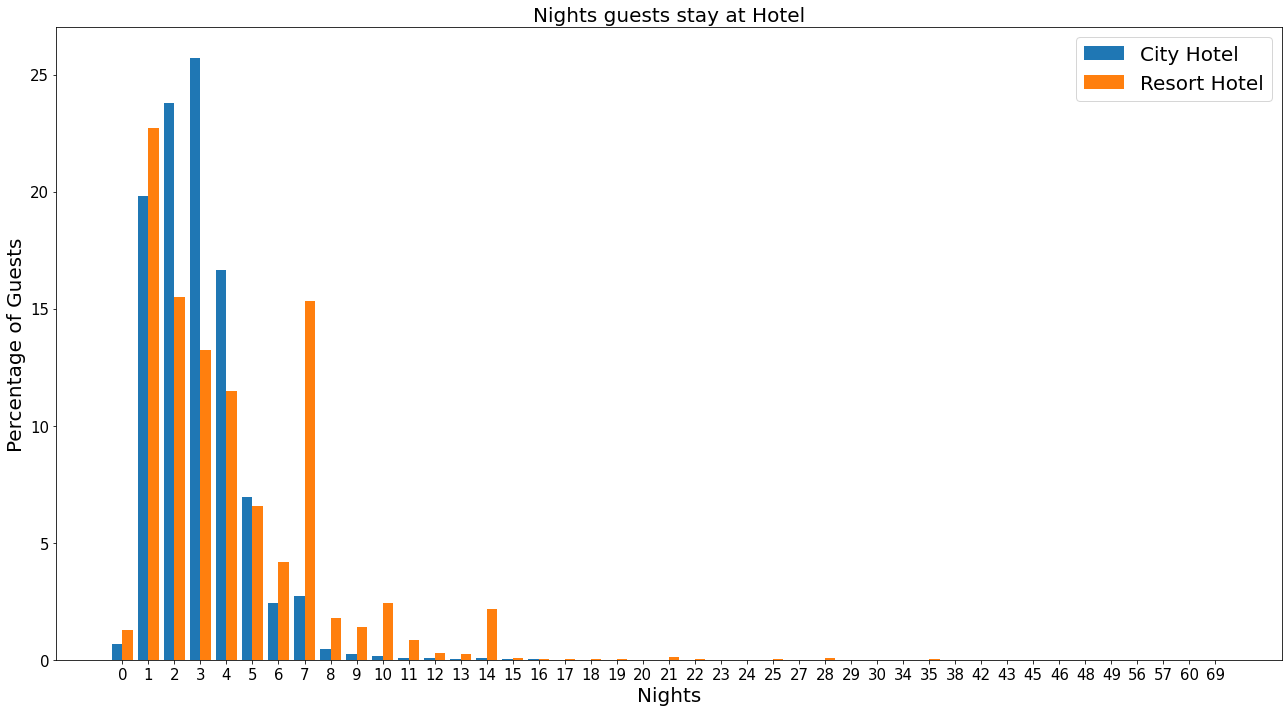

In [146]:
ch = hotels_total_days[0].tolist()
rh = hotels_total_days[1].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig1, ax1 = plt.subplots(figsize=(18, 10))
ax1.bar(x - width/2, ch, width, label='City Hotel')
ax1.bar(x + width/2, rh, width, label='Resort Hotel')

ax1.set_ylabel('Percentage of Guests', fontsize=20)
ax1.set_xlabel('Nights', fontsize=20)
ax1.set_title('Nights guests stay at Hotel', fontsize=20)
#plt.yticks(fontsize=)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(prop={'size': 20})
# change the fontsize
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

fig1.tight_layout()

plt.show()

In [ ]:
city_total_nights = city_hotel["stays_in_weekend_nights"] + city_hotel["stays_in_week_nights"]
resort_total_nights = resort_hotel["stays_in_weekend_nights"] + resort_hotel["stays_in_week_nights"]

city_total_nights

In [ ]:
labels = ["City Hotel", "Resort Hotel"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig1, ax1 = plt.subplots(figsize=(15, 10))
rects1 = ax1.bar(x - width/2, city_total_nights, width, label='City Hotel')
rects2 = ax1.bar(x + width/2, resort_total_nights, width, label='Resort Hotel')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

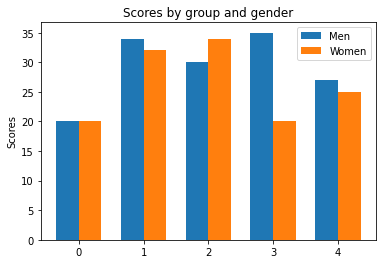

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [20, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [152]:
clean_purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [153]:
clean_purchase_data['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

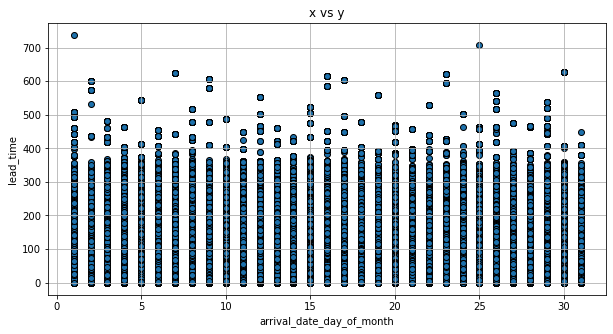

In [150]:
x_values = clean_purchase_data["arrival_date_day_of_month"]
y_values = clean_purchase_data["lead_time"]

## Add properties to the plot
plt.figure(figsize=(10,5))
plt.xlabel('arrival_date_day_of_month')
plt.ylabel('lead_time')
plt.title('x vs y')
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values, marker='o', color='#1d71ac', edgecolors='black')

#plt.savefig("Images/lat_vs_max_temp.png", bbox_inches = "tight")
plt.show()

In [154]:
from datetime import datetime

print(datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

2021-05-08 00:48:06.797


In [155]:
clean_purchase_data.groupby('lead_time').count()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
lead_time,,,,,,,,,,,,,,,,,,,,,
0,6345,6345,6345,6345,6345,6345,6345,6345,6345,6345,...,6345,6345,6345,6345,6345,6345,6345,6345,6345,6345
1,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460,...,3460,3460,3460,3460,3460,3460,3460,3460,3460,3460
2,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,...,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069
3,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,...,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816
4,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715,...,1715,1715,1715,1715,1715,1715,1715,1715,1715,1715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
626,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
629,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [192]:
lead_less_than_50 = clean_purchase_data.loc[clean_purchase_data['lead_time']<50]

In [193]:
len(lead_less_than_50)

50281

In [194]:
lead_over_50 = clean_purchase_data.loc[clean_purchase_data['lead_time']>50]

In [195]:
len(clean_purchase_data3)

68582

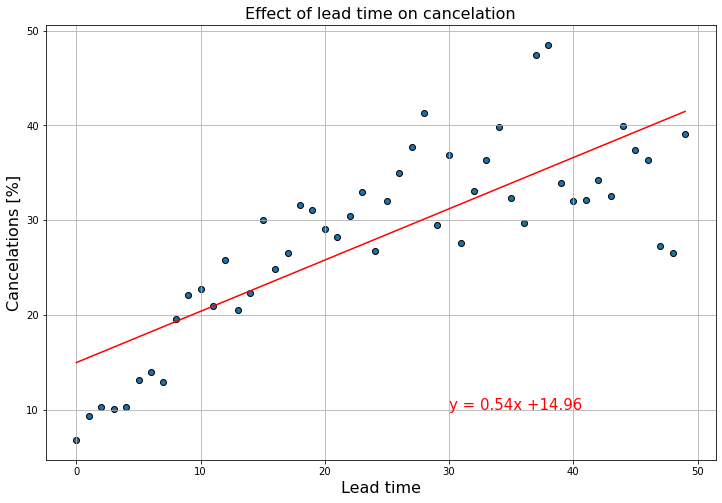

The r-value is: 0.6388956417785646


In [197]:
# group data for lead_time:
lead_cancel_data_50 = lead_less_than_50.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data_50.loc[lead_cancel_data_50["count"] >= 10]
#show figure:
plt.figure(figsize=(12, 8))

x_values = lead_cancel_data_10.index
y_values = lead_cancel_data_10["mean"].values * 100

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


#sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.scatter(x_values, y_values, marker='o', color='#1d71ac', edgecolors='black')
plt.plot(x_values,regress_values,"r-")



plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.grid()
plt.show()

print(f"The r-value is: {rvalue**2}")

In [177]:
lead_cancel_data_10[]

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
51,366.0,0.338798,0.473949,0.0,0.0,0.0,1.0,1.0
52,435.0,0.439080,0.496846,0.0,0.0,0.0,1.0,1.0
53,530.0,0.294340,0.456176,0.0,0.0,0.0,1.0,1.0
54,472.0,0.453390,0.498351,0.0,0.0,0.0,1.0,1.0
55,575.0,0.313043,0.464136,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
608,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
615,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [170]:
lead_cancel_data_50['mean'].mean()

0.2821756902230002

In [175]:
lead_cancel_data_50

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
51,366.0,0.338798,0.473949,0.0,0.0,0.0,1.0,1.0
52,435.0,0.439080,0.496846,0.0,0.0,0.0,1.0,1.0
53,530.0,0.294340,0.456176,0.0,0.0,0.0,1.0,1.0
54,472.0,0.453390,0.498351,0.0,0.0,0.0,1.0,1.0
55,575.0,0.313043,0.464136,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [201]:
lead_over_50 = clean_purchase_data.loc[clean_purchase_data['lead_time']>350]

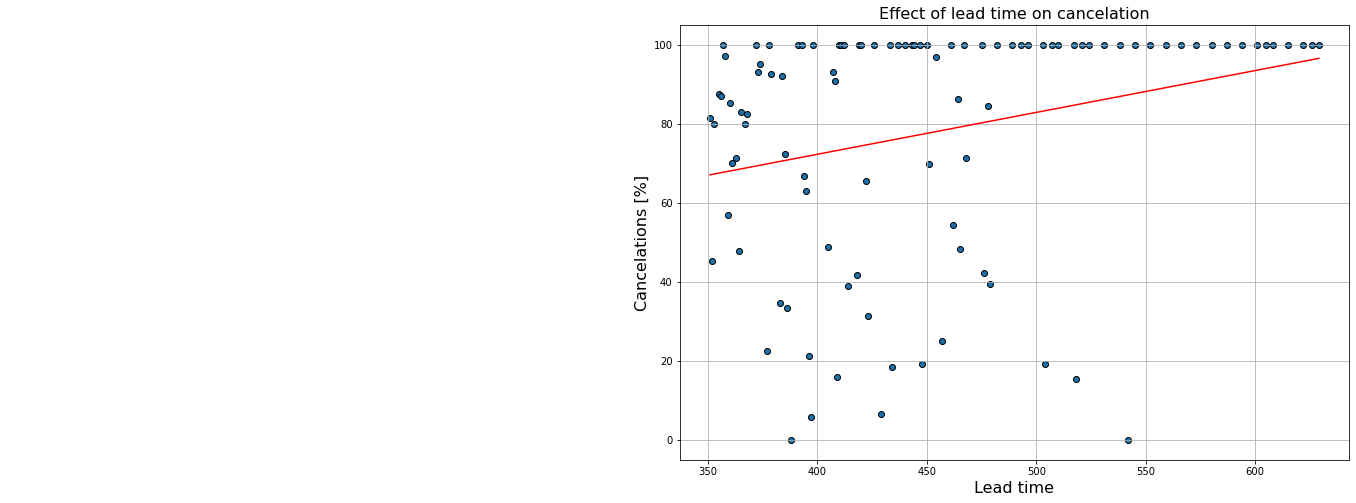

The r-value is: 0.07142574089706245


In [202]:
# group data for lead_time:
lead_cancel_data_over_50 = lead_over_50.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_over_10 = lead_cancel_data_over_50.loc[lead_cancel_data_over_50["count"] >= 10]
#show figure:
plt.figure(figsize=(12, 8))

x_values = lead_cancel_data_over_10.index
y_values = lead_cancel_data_over_10["mean"].values * 100

correlation = st.pearsonr(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


#sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.scatter(x_values, y_values, marker='o', color='#1d71ac', edgecolors='black')
plt.plot(x_values,regress_values,"r-")



plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.grid()
plt.show()

print(f"The r-value is: {rvalue**2}")

In [203]:
lead_cancel_data_over_50['mean'].mean()

0.6954112061237935